### Shallow Neural Network
    - 6주차 과제1

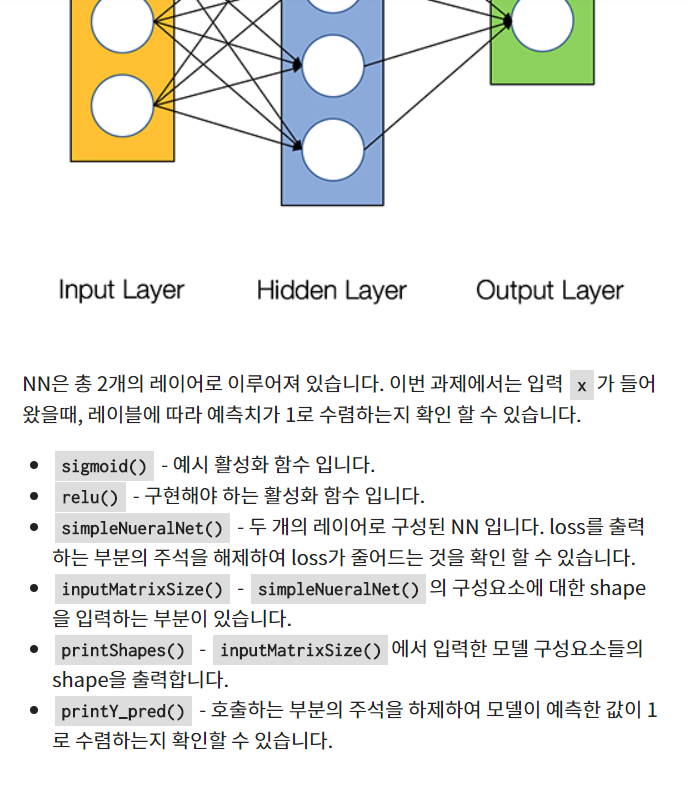

In [2]:
#Setting
import numpy as np
from numpy.random import seed
seed(777)

In [3]:
import elice_utils
eu = elice_utils.EliceUtils()

ModuleNotFoundError: No module named 'elice_utils'

In [4]:
#sigmoid 함수 정의
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

In [5]:
#Relu 함수 정의
def relu(h):
    return h * (h >0)

In [6]:
def simpleNueralNet(): #simpleNeuralNet 구성
    # N is batch size; D_in is input dimension;
    # H is hidden dimension; D_out is output dimension.
    N, D_in, H, D_out = 64, 1000, 100, 10

    # Create random input and output data
    x = np.zeros((N, D_in))  # Q1-1
    x.fill(0.025)
    y = np.ones((N, D_out)) # Q1-2

    # Randomly initialize weights
    w1 = np.random.randn(D_in, H)  # Q1-3
    w2 = np.random.randn(H, D_out) # Q1-4

    learning_rate = 1e-6
    for t in range(5000):
        # Forward pass: compute predicted y
        h = x.dot(w1) # Q1-5
        h_relu = relu(h) # Q1-6
        y_pred = h_relu.dot(w2) # Q1-7

        # Compute and print loss
        loss = np.square(y_pred - y).sum()
#         print(t, loss) # you can check losses

        # Backprop to compute gradients of w1 and w2 with respect to loss
        grad_y_pred = 2.0 * (y_pred - y) # Q1-8
        grad_w2 = h_relu.T.dot(grad_y_pred) # Q1-9
        grad_h_relu = grad_y_pred.dot(w2.T) # Q1-10
        grad_h = grad_h_relu.copy()
        grad_h[h < 0] = 0
        grad_w1 = x.T.dot(grad_h) # Q1-11

        # Update weights
        w1 -= learning_rate * grad_w1 # Q1-12
        w2 -= learning_rate * grad_w2 # Q1-13

In [7]:
simpleNueralNet()

In [14]:
# Q1. input all ?
def inputMatrixSize():
    ### START CODE FROM HERE ### (Change '?' to shape or size)
    shapes = []    
    # Q1-1. Input the shapes of N, D_in and x
    shapes += ['64', '1000', '64'+','+'1000']
    # Q1-2. Input the shapes of N, D_out, y
    shapes += ['64', '10', '64'+','+'10']
    # Q1-3. Input the shapes of D_in, H, w1
    shapes += ['1000', '100', '1000'+','+'100']
    # Q1-4. Input the shapes of H, D_out, w2
    shapes += ['100', '10', '100'+','+'10']
    # Q1-5. Input the shapes of x, w1, h
    shapes += ['64'+','+'1000', '1000'+','+'100', '64'+','+'100']
    # Q1-6. Input the shapes of h, h_relu
    shapes += ['64'+','+'100', '64'+','+'100']
    # Q1-7. Input the shapes of h_relu, w2, y_pred
    shapes += ['64'+','+'100', '100'+','+'10', '64'+','+'10']
    # Q1-8. Input the shapes of y_pred, y, grad_y_pred
    shapes += ['64'+','+'10', '64'+','+'10', '64'+','+'10']
    # Q1-9. Input the shapes of h_relu.T, grad_y_pred, grad_w2
    shapes += ['100'+','+'64', '64'+','+'10', '100'+','+'10']
    # Q1-10. Input the shapes of grad_y_pred, w2.T, grad_h_relu
    shapes += ['64'+','+'10', '10'+','+'100', '64'+','+'100']
    # Q1-11. Input the shapes of x.T, grad_h, grad_w1
    shapes += ['1000'+','+'64', '64'+','+'100', '1000'+','+'100']
    # Q1-12. Input the shapes of grad_w1, w1
    shapes += ['1000'+','+'100', '1000'+','+'100']
    # Q1-13. Input the shapes of grad_w2, w2
    shapes += ['100'+','+'10', '100'+','+'10']
    ### END CODE HERE ###
    
    return shapes

In [15]:
# print shapes of each line's
def printShapes(shapes):
    print("""
    # N is batch size; D_in is input dimension;
    # H is hidden dimension; D_out is output dimension.
    N, D_in, H, D_out = 64, 1000, 100, 10

    # Create random input and output data
    x = np.zeros((N, D_in))  # Q1-1 {},{} = ({})
    x.fill(0.025)
    y = np.random.randn(N, D_out) # Q1-2 {},{} = ({})

    # Randomly initialize weights
    w1 = np.random.randn(D_in, H)  # Q1-3 {},{} = ({})
    w2 = np.random.randn(H, D_out) # Q1-4 {},{} = ({})

    learning_rate = 1e-6
    for t in range(5000):
        # Forward pass: compute predicted y
        h = x.dot(w1) # Q1-5 ({})×({}) = ({})
        h_relu = relu(h) # Q1-6 relu({}) = ({})
        y_pred = h_relu.dot(w2) # Q1-7 ({})×({}) = ({})

        # Compute and print loss
        loss = np.square(y_pred - y).sum()
        print(t, loss)

        # Backprop to compute gradients of w1 and w2 with respect to loss
        grad_y_pred = 2.0 * (y_pred - y) # Q1-8 y_pred:({}) - y:({}) = grad_y_pred:({})
        grad_w2 = h_relu.T.dot(grad_y_pred) # Q1-9 ({})×({}) = ({})
        grad_h_relu = grad_y_pred.dot(w2.T) # Q1-10({})×({}) = ({})
        grad_h = grad_h_relu.copy()
        grad_h[h < 0] = 0
        grad_w1 = x.T.dot(grad_h) # Q1-11 ({})×({}) = ({})

        # Update weights
        w1 -= learning_rate * grad_w1 # Q1-12 grad_w1:({}), w1:({})
        w2 -= learning_rate * grad_w2 # Q1-13 grad_w2:({}), w2:({})
    """.format(*shapes))

shapes = inputMatrixSize()
printShapes(shapes)

def printY_pred(y_pred):
    print(y_pred)
    
# printY_pred(y_pred)


    # N is batch size; D_in is input dimension;
    # H is hidden dimension; D_out is output dimension.
    N, D_in, H, D_out = 64, 1000, 100, 10

    # Create random input and output data
    x = np.zeros((N, D_in))  # Q1-1 64,1000 = (64,1000)
    x.fill(0.025)
    y = np.random.randn(N, D_out) # Q1-2 64,10 = (64,10)

    # Randomly initialize weights
    w1 = np.random.randn(D_in, H)  # Q1-3 1000,100 = (1000,100)
    w2 = np.random.randn(H, D_out) # Q1-4 100,10 = (100,10)

    learning_rate = 1e-6
    for t in range(5000):
        # Forward pass: compute predicted y
        h = x.dot(w1) # Q1-5 (64,1000)×(1000,100) = (64,100)
        h_relu = relu(h) # Q1-6 relu(64,100) = (64,100)
        y_pred = h_relu.dot(w2) # Q1-7 (64,100)×(100,10) = (64,10)

        # Compute and print loss
        loss = np.square(y_pred - y).sum()
        print(t, loss)

        # Backprop to compute gradients of w1 and w2 with respect to loss
        grad_y_pred = 2.0 * (y_pred - y) # Q1-8 y_pred:(64,10) - 